In [12]:
import sklearn
import numpy
import pandas
import scipy
import re
import string
import datetime
from datetime import date

In [13]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [14]:
from sklearn import preprocessing 

In [15]:
pandas.options.mode.chained_assignment = None

In [16]:
file=open('./jbsoa.csv')
data=pandas.read_csv(file)

In [6]:
data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Resolution,Components,Labels,...,JMS_lab,MessCore_lab,Tools_lab,EAP_lab,jUddi_lab,BPEL_lab,JBossWS_lab,JBRules_lab,Examples_lab,Other_lab
0,6121,0,SOA-3584,Client Recieving java.lang.IndexOutOfBoundsExc...,Closed,JBoss Enterprise SOA Platform,Major,Done,EDS,NaN,...,0,0,0,0,0,0,0,0,0,0
1,6122,1,SOA-3546,jpdl-3.2.xsd is missing cancel-event attribute,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,JBPM - standalone JBPM - within SOA,NaN,...,0,0,0,0,0,0,0,0,0,0
2,6123,2,SOA-3052,"JBDS 4 - jBPM upload URL is: ""/jbpm-console/u...",Closed,JBoss Enterprise SOA Platform,Critical,Migrated to another ITS,JBPM - within SOA Tooling,NaN,...,0,0,1,0,0,0,0,0,0,0
3,6124,3,SOA-3417,BusinessRulesProcessor action needs better sup...,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,JBossESB,NaN,...,0,0,0,0,0,0,0,0,0,0
4,6125,4,SOA-3011,remove backport-util-concurrent.jar in SOA-P,Closed,JBoss Enterprise SOA Platform,Minor,Migrated to another ITS,Compatibility EAP JBPM - within SOA,NaN,...,0,0,0,1,0,0,0,0,0,0
5,6126,5,SOA-3515,JBossWS-CXF JBWS944 test broken,Closed,JBoss Enterprise SOA Platform,Minor,Migrated to another ITS,JBossWS,NaN,...,0,0,0,0,0,0,1,0,0,0
6,6127,6,SOA-1266,Scout creates a new AuthToken for every invoca...,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,JBossESB,NaN,...,0,0,0,0,0,0,0,0,0,0
7,6128,7,SOA-2030,JmsConnectionPool searches for associated JmsS...,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,JBossESB,NaN,...,0,0,0,0,0,0,0,0,0,0
8,6129,8,SOA-3667,How to enable brms to use modeshape when jboss...,Closed,JBoss Enterprise SOA Platform,Minor,Migrated to another ITS,Documentation EDS,NaN,...,0,0,0,0,0,0,0,0,0,0
9,6130,9,SOA-3431,JBossWS Native testsuite depends on aop versio...,Closed,JBoss Enterprise SOA Platform,Major,Migrated to another ITS,Build Process JBossWS,NaN,...,0,0,0,0,0,0,1,0,0,0


ttr
Минимум: 0  Максимум: 1354  Среднее: 118.82767624020887
Attachments
Минимум: 0  Максимум: 13  Среднее: 0.3268059181897302
Comments
Минимум: 1  Максимум: 34  Среднее: 4.535248041775457


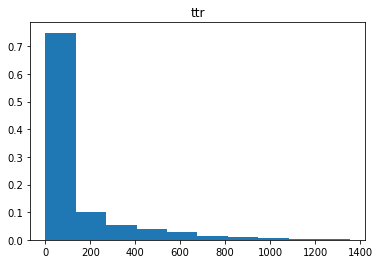

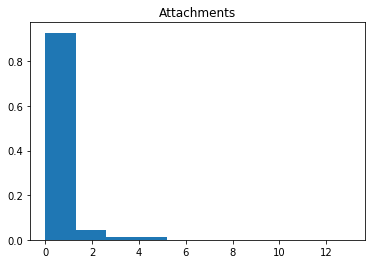

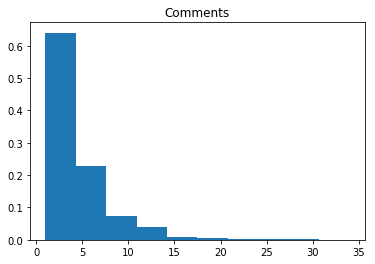

In [17]:
def infa(data, field):
    print (field)    
    print ('Минимум: ' + str(data[field].min())+ '  Максимум: ' + str(data[field].max())+'  Среднее: ' + str(data[field].mean()))
        
    plt.figure()
    btt=numpy.array(data[field])
    hist_rf=plt.hist(btt, weights=numpy.zeros_like(btt) + 1. / btt.size, bins=10)
    plt.title(field) 
    
    return

infa(data, 'ttr')
infa(data, 'Attachments')
infa(data, 'Comments')

Resolution
Cannot Reproduce             40
Deferred                     10
Done                       1665
Duplicate Issue              79
Incomplete Description        2
Migrated to another ITS     126
Out of Date                 128
Partially Completed           2
Rejected                    148
Won't Fix                    98
Name: Issue_key, dtype: int64


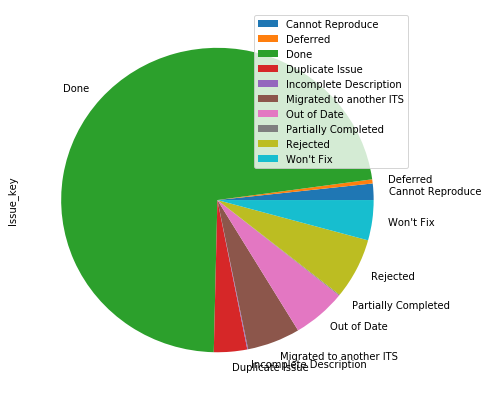

In [18]:
print(data.groupby(['Resolution'])['Issue_key'].count())
plot = data.groupby(['Resolution'])['Issue_key'].count().plot.pie(y='Status', figsize=(7, 7),  legend=True)

Priority
Blocker      268
Critical     215
Major       1461
Minor        332
Optional       8
Trivial       14
Name: Issue_key, dtype: int64


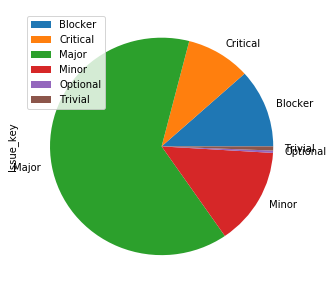

In [19]:
print(data.groupby(['Priority'])['Issue_key'].count())
plot = data.groupby(['Priority'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

was_reopened
0.0    1788
1.0     510
Name: Issue_key, dtype: int64


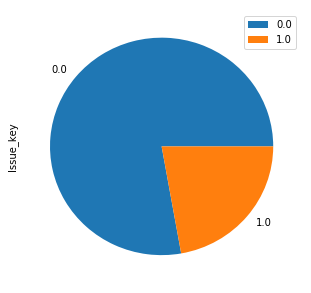

In [20]:
print(data.groupby(['was_reopened'])['Issue_key'].count())
plot = data.groupby(['was_reopened'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

In [21]:
AOT=['Docs', 'Build', 'MonitorManage', 'ESB', 'EDS', 'JBPM', 'JMS', 'Tools', 'EAP', 'jUddi', 'BPEL','JBossWS', 'JBRules', 'Examples', 'Other' ]

<BarContainer object of 15 artists>

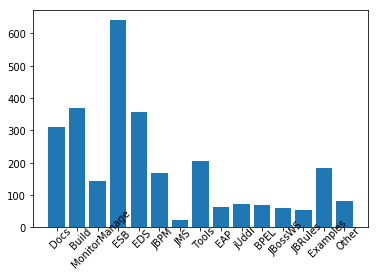

In [22]:
an={}
for i in range(len(AOT)):
    an.update({AOT[i]:data[AOT[i]+'_lab'].sum()}) 

plt.figure()
plt.xticks(range(len(an)), an.keys(),rotation=45, rotation_mode='anchor')    
plt.bar(range(len(an)), an.values(), align='center')

In [23]:
bin_data=data

bin_data=pandas.get_dummies(bin_data, prefix=['Resolution'], columns=['Resolution'])

bin_data['Priority_ord']=bin_data['Priority'].astype("category", ordered=True,categories=['Optional', 'Trivial', 'Minor', 'Major', 'Critical', 'Blocker']).cat.codes

bin_data['norm_ttr']=preprocessing.scale(bin_data['ttr'])
bin_data['norm_att']=preprocessing.scale(bin_data['Attachments'])
bin_data['norm_comm']=preprocessing.scale(bin_data['Comments'])

bin_data['Resolution_Wont Fix_new']=bin_data["Resolution_Won't Fix"]+bin_data['Resolution_Cannot Reproduce']+bin_data['Resolution_Incomplete Description']
bin_data['Resolution_Out of Date_new']=bin_data['Resolution_Out of Date']+bin_data['Resolution_Deferred']+bin_data['Resolution_Partially Completed']

/Users/annagromova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
/Users/annagromova/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [14]:
bin_data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Components,Labels,Description,...,Resolution_Out of Date,Resolution_Partially Completed,Resolution_Rejected,Resolution_Won't Fix,Priority_ord,norm_ttr,norm_att,norm_comm,Resolution_Wont Fix_new,Resolution_Out of Date_new
0,6121,0,SOA-3584,Client Recieving java.lang.IndexOutOfBoundsExc...,Closed,JBoss Enterprise SOA Platform,Major,EDS,NaN,When attempting to perform the following quer...,...,0,0,0,0,3,-0.412576,-0.353183,-0.744502,0,0
1,6122,1,SOA-3546,jpdl-3.2.xsd is missing cancel-event attribute,Closed,JBoss Enterprise SOA Platform,Major,JBPM - standalone JBPM - within SOA,NaN,"Platform JIRA for <a href=""https://issues.jbo...",...,0,0,0,0,3,-0.235394,-0.353183,-0.450842,0,0
2,6123,2,SOA-3052,"JBDS 4 - jBPM upload URL is: ""/jbpm-console/u...",Closed,JBoss Enterprise SOA Platform,Critical,JBPM - within SOA Tooling,NaN,"Related to <a href=""https://issues.jboss.org/...",...,0,0,0,0,4,0.670202,-0.353183,0.136479,0,0
3,6124,3,SOA-3417,BusinessRulesProcessor action needs better sup...,Closed,JBoss Enterprise SOA Platform,Major,JBossESB,NaN,"In order to support common CEP scenarios, the...",...,0,0,0,0,3,-0.053291,1.808241,0.430140,0,0
4,6125,4,SOA-3011,remove backport-util-concurrent.jar in SOA-P,Closed,JBoss Enterprise SOA Platform,Minor,Compatibility EAP JBPM - within SOA,NaN,"I see <a href=""https://hudson.qa.jboss.com/hu...",...,0,0,0,0,2,0.798166,-0.353183,0.136479,0,0
5,6126,5,SOA-3515,JBossWS-CXF JBWS944 test broken,Closed,JBoss Enterprise SOA Platform,Minor,JBossWS,NaN,JBWS944 Test in JBossWS-CXF has broken test d...,...,0,0,0,0,2,-0.191099,-0.353183,-1.038163,0,0
6,6127,6,SOA-1266,Scout creates a new AuthToken for every invoca...,Closed,JBoss Enterprise SOA Platform,Major,JBossESB,NaN,"See <a href=""https://issues.jboss.org/browse/...",...,0,0,0,0,3,4.415629,-0.353183,0.136479,0,0
7,6128,7,SOA-2030,JmsConnectionPool searches for associated JmsS...,Closed,JBoss Enterprise SOA Platform,Major,JBossESB,NaN,NaN,...,0,0,0,0,3,2.594594,-0.353183,-0.744502,0,0
8,6129,8,SOA-3667,How to enable brms to use modeshape when jboss...,Closed,JBoss Enterprise SOA Platform,Minor,Documentation EDS,NaN,The jboss-brms.war is being deployed to SOA w...,...,0,0,0,0,2,-0.451950,-0.353183,-0.744502,0,0
9,6130,9,SOA-3431,JBossWS Native testsuite depends on aop versio...,Closed,JBoss Enterprise SOA Platform,Major,Build Process JBossWS,NaN,org.jboss.test.ws.jaxws.samples.dar.JMSClient...,...,0,0,0,0,3,-0.087743,-0.353183,-1.038163,0,0


In [24]:
clust_data=bin_data[['Docs_lab',
 'Build_lab',
 'MonitorManage_lab',
 'ESB_lab',
 'EDS_lab',
 'JBPM_lab',
 'JMS_lab',
 'Tools_lab',
 'EAP_lab',
 'jUddi_lab',
 'BPEL_lab',
 'JBossWS_lab',
 'JBRules_lab',
 'Examples_lab',
 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]


In [57]:
clust_data

,Docs_lab,Build_lab,MonitorManage_lab,ESB_lab,EDS_lab,JBPM_lab,JMS_lab,Tools_lab,EAP_lab,jUddi_lab,...,Resolution_Done,Resolution_Duplicate Issue,Resolution_Out of Date_new,Resolution_Rejected,Resolution_Wont Fix_new,Resolution_Migrated to another ITS,Priority_ord,norm_ttr,norm_att,norm_comm
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.412576,-0.353183,-0.744502
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,3,-0.235394,-0.353183,-0.450842
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,4,0.670202,-0.353183,0.136479
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,3,-0.053291,1.808241,0.430140
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,2,0.798166,-0.353183,0.136479
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,-0.191099,-0.353183,-1.038163
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,3,4.415629,-0.353183,0.136479
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,3,2.594594,-0.353183,-0.744502
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,2,-0.451950,-0.353183,-0.744502
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,-0.087743,-0.353183,-1.038163


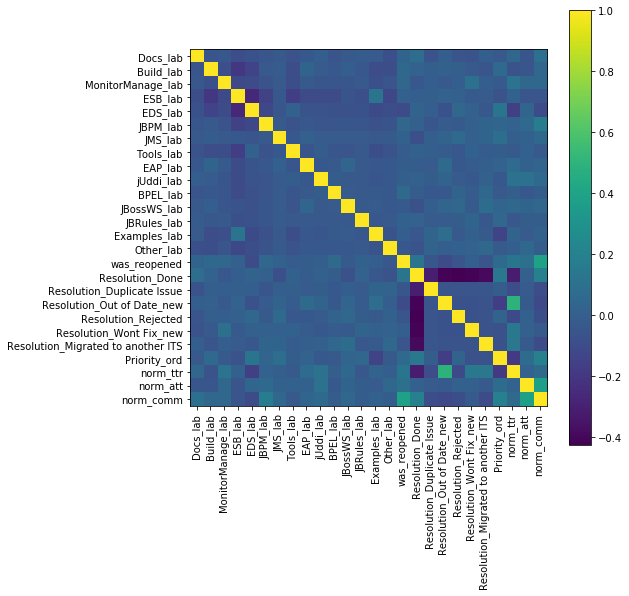

In [58]:
from matplotlib.colors import LinearSegmentedColormap
def corr_heatmap(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    corr_ = data.corr(method='pearson')
    ax.set_xticks(numpy.arange(len(list(data))))
    ax.set_yticks(numpy.arange(len(list(data))))
    ax.set_xticklabels(list(data),rotation=90)
    ax.set_yticklabels(list(data))
    im = ax.imshow(corr_)
    plt.colorbar(im)
    return plt.show()


corr_heatmap(clust_data)


<function matplotlib.pyplot.bar(*args, **kwargs)>

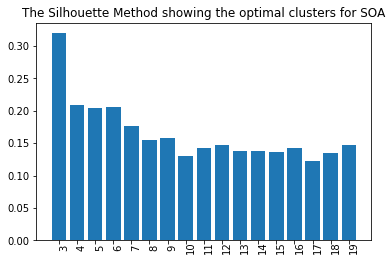

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

def silh_index(data, title):
    silh_ind={}
    for i in range(3,20):
        kmeans=KMeans(n_clusters=i, random_state=42)
        labi=kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data,labi)
        silh_ind.update({i:silhouette_avg})
    plt.figure()
    plt.xticks(range(len(silh_ind)), silh_ind.keys(),rotation=90, rotation_mode='anchor')    
    plt.bar(range(len(silh_ind)), silh_ind.values(), align='center')
    plt.title(title)
    return plt.bar

silh_index(clust_data,'The Silhouette Method showing the optimal clusters for SOA')


In [13]:
def km_clustering(n,data): 
    headers=list(data)
    zz={}
    km = KMeans(n_clusters=n, random_state=42).fit(data)
    data['cluster_km'] = km.labels_
    zentr=numpy.round(km.cluster_centers_, 3)    

    for i in range(n):
        zrow=zentr[i,:]
        zi=dict(zip(headers, zrow))
        zz.update({i:zi})             
    print(zz) 
    return data

data_km=clust_data[['Docs_lab', 'Build_lab', 'MonitorManage_lab', 'ESB_lab', 'EDS_lab', 'JBPM_lab', 'JMS_lab', 'Tools_lab', 'EAP_lab', 'jUddi_lab', 'BPEL_lab', 'JBossWS_lab', 'JBRules_lab', 'Examples_lab', 'Other_lab','was_reopened', 'Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]
d_km=km_clustering(3,data_km)
print (d_km.groupby(['cluster_km']).size())


{0: {'BPEL_lab': 0.024, 'Resolution_Done': 0.837, 'JMS_lab': 0.033, 'JBPM_lab': 0.139, 'was_reopened': 0.498, 'Resolution_Duplicate Issue': 0.019, 'Priority_ord': 3.67, 'Tools_lab': 0.072, 'MonitorManage_lab': 0.072, 'norm_ttr': -0.036, 'EDS_lab': 0.129, 'Build_lab': 0.187, 'norm_att': 1.969, 'Examples_lab': 0.096, 'Docs_lab': 0.153, 'JBossWS_lab': 0.057, 'Resolution_Out of Date_new': 0.019, 'jUddi_lab': 0.067, 'ESB_lab': 0.23, 'norm_comm': 2.004, 'Resolution_Wont Fix_new': 0.043, 'Other_lab': 0.067, 'Resolution_Rejected': 0.057, 'JBRules_lab': 0.029, 'Resolution_Migrated to another ITS': 0.024, 'EAP_lab': 0.048}, 1: {'BPEL_lab': 0.03, 'Resolution_Done': 0.78, 'JMS_lab': 0.007, 'JBPM_lab': 0.068, 'was_reopened': 0.189, 'Resolution_Duplicate Issue': 0.041, 'Priority_ord': 3.174, 'Tools_lab': 0.092, 'MonitorManage_lab': 0.047, 'norm_ttr': -0.348, 'EDS_lab': 0.177, 'Build_lab': 0.166, 'norm_att': -0.207, 'Examples_lab': 0.074, 'Docs_lab': 0.136, 'JBossWS_lab': 0.02, 'Resolution_Out of Dat

In [14]:
print(d_km.groupby(['cluster_km','Priority_ord']).size())

cluster_km  Priority_ord
0           2                 13
            3                105
            4                 29
            5                 62
1           0                  5
            1                 10
            2                235
            3               1175
            4                177
            5                204
2           0                  3
            1                  4
            2                 84
            3                181
            4                  9
            5                  2
dtype: int64


<module 'matplotlib.pyplot' from '/Users/annagromova/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

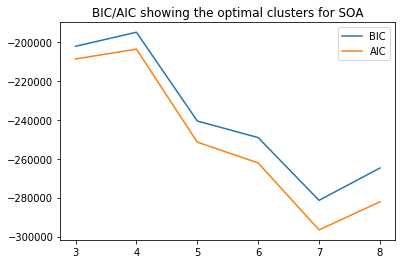

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM

def AIC_BIC(data, title):
    plt.figure()
    n_components = numpy.arange(3, 9)    
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data)
              for n in n_components]
    plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
    plt.legend() 
    plt.title(title)
    return plt

AIC_BIC(clust_data,'BIC/AIC showing the optimal clusters for SOA')

In [10]:
def em_clust(data,n):
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data)
    data['cluster_em'] = gmm.predict(data)
    for i in range (n):
        temp=data[data['cluster_em']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())

    return 


clust_data_gmm=clust_data[['Docs_lab', 'Build_lab', 'MonitorManage_lab', 'ESB_lab', 'EDS_lab', 'JBPM_lab', 'JMS_lab', 'Tools_lab', 'EAP_lab', 'jUddi_lab', 'BPEL_lab', 'JBossWS_lab', 'JBRules_lab', 'Examples_lab', 'Other_lab','was_reopened' ,'Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]
em_clust(clust_data_gmm,7)

Cluster # 0, count: 774
Docs_lab                              0.227390
Build_lab                             0.288114
MonitorManage_lab                     0.000000
ESB_lab                               0.000000
EDS_lab                               0.368217
JBPM_lab                              0.000000
JMS_lab                               0.000000
Tools_lab                             0.188630
EAP_lab                               0.000000
jUddi_lab                             0.000000
BPEL_lab                              0.000000
JBossWS_lab                           0.000000
JBRules_lab                           0.052972
Examples_lab                          0.000000
Other_lab                             0.000000
was_reopened                          0.208010
Resolution_Done                       0.921189
Resolution_Duplicate Issue            0.000000
Resolution_Out of Date_new            0.000000
Resolution_Rejected                   0.078811
Resolution_Wont Fix_new             

In [15]:
print(clust_data_gmm.groupby(['cluster_em','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_gmm.groupby(['cluster_em',AOT[i]+'_lab']).size())

cluster_em  Priority_ord
0           0                 3
            1                 2
            2                96
            3               464
            4                75
            5               134
1           0                 1
            1                 2
            2                43
            3               145
            4                18
            5                21
2           2                30
            3               111
            4                18
            5                15
3           1                 4
            2                44
            3               239
            4                34
            5                41
4           0                 2
            1                 1
            2                47
            3                84
            4                 5
            5                 2
5           0                 2
            1                 5
            2                70
            3  

In [66]:
print(clust_data_gmm[(clust_data_gmm['Resolution_Out of Date_new']==1)&(clust_data_gmm['cluster_em']==3)]['norm_ttr'].mean())



1.935381640920369


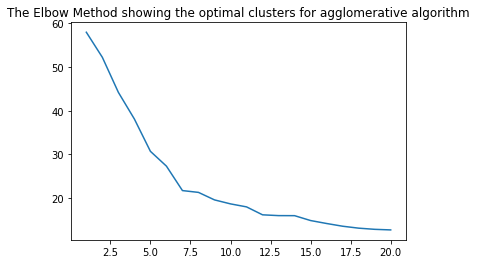

In [67]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def elbow(data):
    plt.figure()
    Z = linkage(data, 'ward')
    last = Z[-20:, 2]
    last_rev = last[::-1] #по убыванию
    idxs = numpy.arange(1, len(last) + 1)
    plt.plot(idxs, last_rev)
    plt.title('The Elbow Method showing the optimal clusters for agglomerative algorithm')
    return

elbow(clust_data)

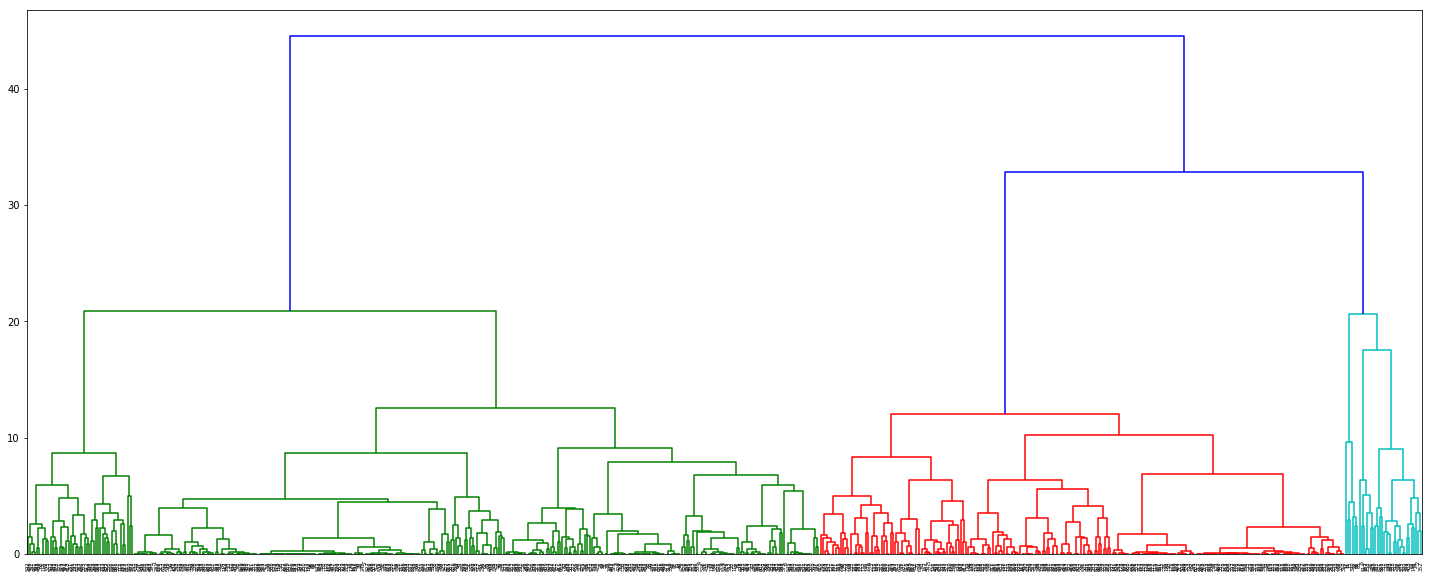

Cluster # 1, count: 1
authorization                 0.000000
authentication                1.000000
credential                    0.000000
ssl                           0.000000
api                           0.000000
utils                         0.000000
Other                         0.000000
Resolution_Done               1.000000
Resolution_Duplicate Issue    0.000000
Resolution_Out of Date_new    0.000000
Resolution_Rejected_new       0.000000
Resolution_Wont Fix_new       0.000000
Priority_ord                  3.000000
norm_ttr                      1.157003
norm_att                     -0.187852
norm_comm                     0.034805
cluster_hier                  1.000000
dtype: float64
Cluster # 2, count: 1
authorization                 0.000000
authentication                1.000000
credential                    0.000000
ssl                           0.000000
api                           0.000000
utils                         0.000000
Other                         0.000000
Resol

dtype: float64
Cluster # 129, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           1.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    2.000000
norm_ttr                       -0.236109
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  129.000000
dtype: float64
Cluster # 130, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils               

dtype: float64
Cluster # 243, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           0.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    3.000000
norm_ttr                       -0.457333
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  243.000000
dtype: float64
Cluster # 244, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils               

Cluster # 377, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           0.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    4.000000
norm_ttr                       -0.576913
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  377.000000
dtype: float64
Cluster # 378, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.0

Cluster # 493, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           1.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    4.000000
norm_ttr                       -0.523102
norm_att                        4.561622
norm_comm                       3.011733
cluster_hier                  493.000000
dtype: float64
Cluster # 494, count: 0
authorization                NaN
authentication               NaN
credential                   NaN
ssl                          NaN
api                          NaN
utils                        NaN
Other                        NaN
Resolutio

In [98]:
hier(clust_data_hier,len(clust_data.index))

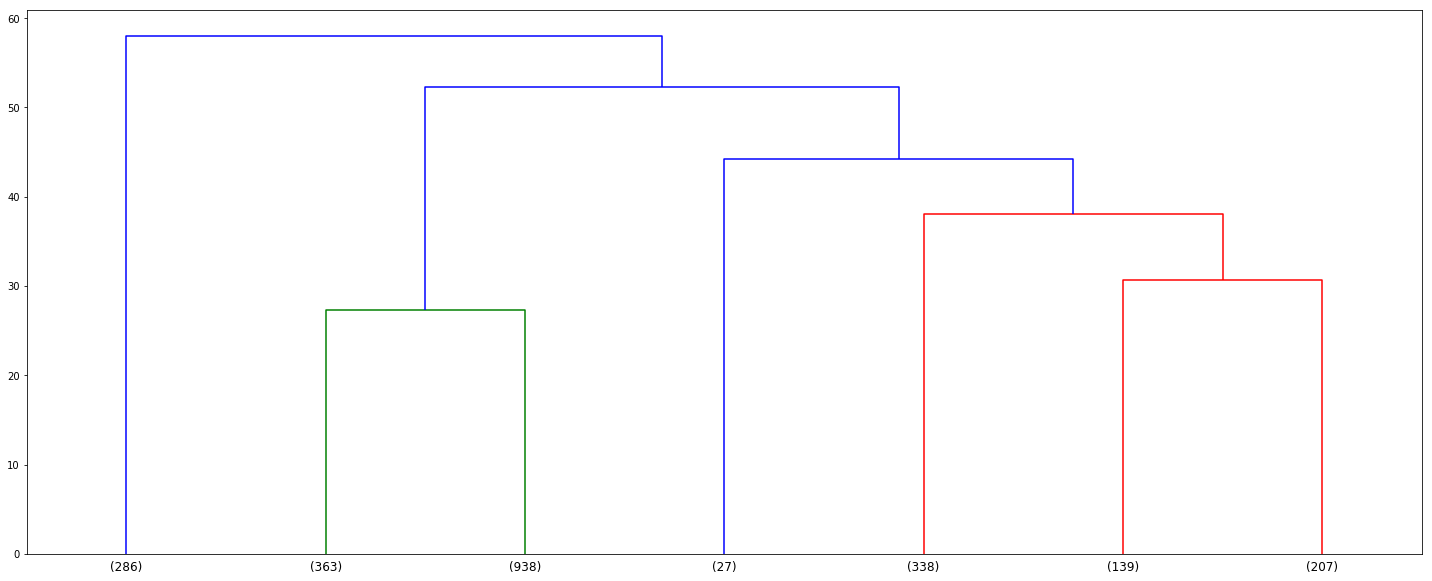

Cluster # 1, count: 286
Docs_lab                              0.118881
Build_lab                             0.104895
MonitorManage_lab                     0.146853
ESB_lab                               0.262238
EDS_lab                               0.041958
JBPM_lab                              0.055944
JMS_lab                               0.006993
Tools_lab                             0.083916
EAP_lab                               0.080420
jUddi_lab                             0.094406
BPEL_lab                              0.034965
JBossWS_lab                           0.027972
JBRules_lab                           0.010490
Examples_lab                          0.101399
Other_lab                             0.055944
was_reopened                          0.199301
Resolution_Done                       0.342657
Resolution_Duplicate Issue            0.003497
Resolution_Out of Date_new            0.395105
Resolution_Rejected                   0.017483
Resolution_Wont Fix_new             

In [69]:

def hier(data, n_clust):
    Z = linkage(data, 'ward')
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(Z,truncate_mode='lastp', p=n_clust)
    plt.show()
    clust_num = fcluster(Z,n_clust,criterion='maxclust')
    data['cluster_hier']=clust_num
    for i in range (1,n_clust+1):
        temp=data[data['cluster_hier']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())
    return 

clust_data_hier=clust_data[['Docs_lab', 'Build_lab', 'MonitorManage_lab', 'ESB_lab', 'EDS_lab', 'JBPM_lab', 'JMS_lab', 'Tools_lab', 'EAP_lab', 'jUddi_lab', 'BPEL_lab', 'JBossWS_lab', 'JBRules_lab', 'Examples_lab', 'Other_lab', 'was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]


hier(clust_data_hier,7)

In [120]:
print(clust_data_hier.groupby(['cluster_hier','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_hier.groupby(['cluster_hier',AOT[i]+'_lab']).size())


cluster_hier  Priority_ord
1             0                 3
              1                 3
              2                86
              3               185
              4                 9
2             2                55
              3               271
              4                30
              5                 7
3             0                 5
              1                11
              2               169
              3               741
              4                12
4             2                 1
              3                10
              4                 5
              5                11
5             3                 1
              4               110
              5               227
6             2                 5
              3               116
              4                14
              5                 4
7             2                16
              3               137
              4                35
              5      

In [70]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

def aff_clust(data):
    af = AffinityPropagation(preference=-300, damping=0.9).fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    data['cluster_aff'] = af.labels_

    n_clusters_aff = len(cluster_centers_indices)

    print('Number of clusters: ', n_clusters_aff)   
    
    for i in range (n_clusters_aff):
        print ('---------MEAN VALUES------')
        temp=data[data['cluster_aff']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())
        
        print ('-------CLUSTER CENTERS-----')
        print ('zentroid # '+str(i))
        pos=cluster_centers_indices[i]
        print (data.iloc[pos])
    
    return

clust_data_aff=clust_data[['Docs_lab', 'Build_lab', 'MonitorManage_lab', 'ESB_lab', 'EDS_lab', 'JBPM_lab', 'JMS_lab', 'Tools_lab', 'EAP_lab', 'jUddi_lab', 'BPEL_lab', 'JBossWS_lab', 'JBRules_lab', 'Examples_lab', 'Other_lab','was_reopened' ,'Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Migrated to another ITS', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

aff_clust(clust_data_aff)

Number of clusters:  8
---------MEAN VALUES------
Cluster # 0, count: 310
Docs_lab                              0.064516
Build_lab                             0.019355
MonitorManage_lab                     0.077419
ESB_lab                               0.003226
EDS_lab                               0.716129
JBPM_lab                              0.022581
JMS_lab                               0.000000
Tools_lab                             0.119355
EAP_lab                               0.029032
jUddi_lab                             0.041935
BPEL_lab                              0.003226
JBossWS_lab                           0.016129
JBRules_lab                           0.006452
Examples_lab                          0.035484
Other_lab                             0.016129
was_reopened                          0.077419
Resolution_Done                       0.722581
Resolution_Duplicate Issue            0.041935
Resolution_Out of Date_new            0.009677
Resolution_Rejected              

In [121]:
print(clust_data_aff.groupby(['cluster_aff','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_aff.groupby(['cluster_aff',AOT[i]+'_lab']).size())

cluster_aff  Priority_ord
0            2                30
             3               255
             4                25
1            2                 2
             3                16
             4                 6
             5                19
2            1                 2
             2                60
             3               218
             4                26
             5                 1
3            2                 9
             3                57
             4                13
             5                 7
4            0                 3
             1                 4
             2                78
             3               336
             4                47
5            4                40
             5               241
6            0                 3
             1                 3
             2                70
             3               143
             4                 7
7            0                 2
             1   

In [98]:
q1=bin_data[(bin_data['Resolution_Duplicate Issue']==1)|(bin_data['Resolution_Out of Date_new']==1)|(bin_data['Resolution_Rejected']==1)|(bin_data["Resolution_Wont Fix_new"]==1)|(bin_data['Resolution_Migrated to another ITS']==1)]
q2=bin_data[bin_data['Resolution_Done']==1]
q3=bin_data[bin_data['Resolution_Out of Date_new']==1]
q4=bin_data[bin_data['Resolution_Rejected']==1]
q5=bin_data[bin_data["Resolution_Wont Fix_new"]==1]
q6=bin_data[bin_data['Resolution_Migrated to another ITS']==1]
q7=bin_data[bin_data['Resolution_Duplicate Issue']==1]
q8=bin_data[bin_data['was_reopened']==1]

633
ttr
Минимум: 0  Максимум: 1354  Среднее: 223.24644549763033
Comments
Минимум: 1  Максимум: 28  Среднее: 3.448657187993681


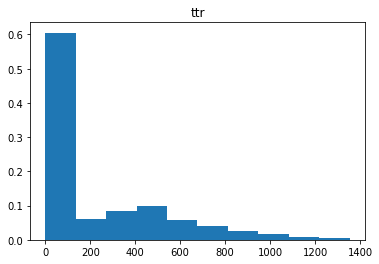

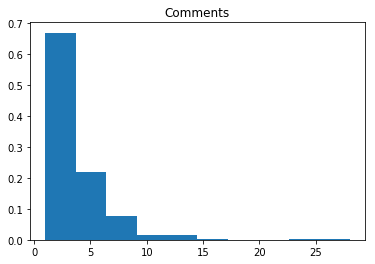

In [106]:
#проблемные баги
print(q1.Issue_key.count())
infa(q1,'ttr')
infa(q1,'Comments')

In [88]:
for i in range(len(AOT)):
    print(q1[[AOT[i]+'_lab']].sum())

Docs_lab    55
dtype: int64
Build_lab    92
dtype: int64
MonitorManage_lab    49
dtype: int64
ESB_lab    177
dtype: int64
EDS_lab    89
dtype: int64
JBPM_lab    43
dtype: int64
JMS_lab    14
dtype: int64
Tools_lab    51
dtype: int64
EAP_lab    19
dtype: int64
jUddi_lab    18
dtype: int64
BPEL_lab    20
dtype: int64
JBossWS_lab    29
dtype: int64
JBRules_lab    12
dtype: int64
Examples_lab    62
dtype: int64
Other_lab    34
dtype: int64


1665
ttr
Минимум: 0  Максимум: 1206  Среднее: 79.12972972972973
Comments
Минимум: 1  Максимум: 34  Среднее: 4.948348348348349


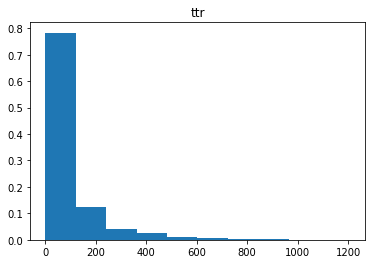

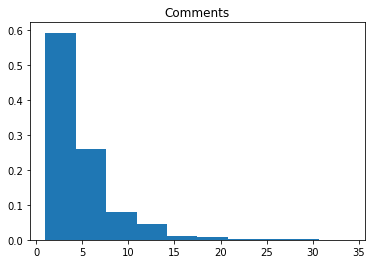

In [107]:
#беспроблемные
print(q2.Issue_key.count())
infa(q2,'ttr')
infa(q2,'Comments')

In [89]:
for i in range(len(AOT)):
    print(q2[[AOT[i]+'_lab']].sum())

Docs_lab    254
dtype: int64
Build_lab    276
dtype: int64
MonitorManage_lab    95
dtype: int64
ESB_lab    464
dtype: int64
EDS_lab    269
dtype: int64
JBPM_lab    126
dtype: int64
JMS_lab    9
dtype: int64
Tools_lab    154
dtype: int64
EAP_lab    44
dtype: int64
jUddi_lab    54
dtype: int64
BPEL_lab    50
dtype: int64
JBossWS_lab    32
dtype: int64
JBRules_lab    43
dtype: int64
Examples_lab    123
dtype: int64
Other_lab    47
dtype: int64


140
ttr
Минимум: 0  Максимум: 1239  Среднее: 514.2071428571429
Comments
Минимум: 1  Максимум: 15  Среднее: 3.0785714285714287


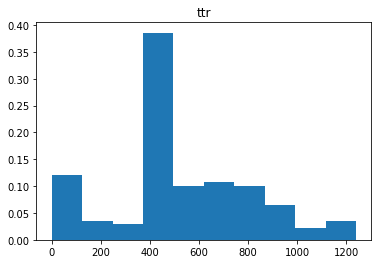

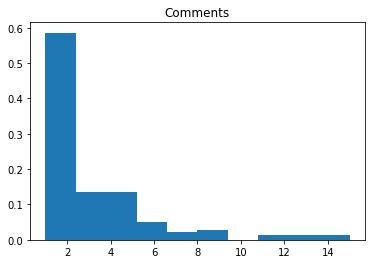

In [108]:
#устаревшие
print(q3.Issue_key.count())
infa(q3,'ttr')
infa(q3,'Comments')

In [114]:
for i in range(len(AOT)):
    print(q3[[AOT[i]+'_lab']].sum())


Docs_lab    19
dtype: int64
Build_lab    25
dtype: int64
MonitorManage_lab    5
dtype: int64
ESB_lab    45
dtype: int64
EDS_lab    9
dtype: int64
JBPM_lab    8
dtype: int64
JMS_lab    3
dtype: int64
Tools_lab    11
dtype: int64
EAP_lab    10
dtype: int64
jUddi_lab    7
dtype: int64
BPEL_lab    1
dtype: int64
JBossWS_lab    7
dtype: int64
JBRules_lab    2
dtype: int64
Examples_lab    24
dtype: int64
Other_lab    5
dtype: int64


148
ttr
Минимум: 0  Максимум: 444  Среднее: 32.41891891891892
Comments
Минимум: 1  Максимум: 11  Среднее: 3.4864864864864864


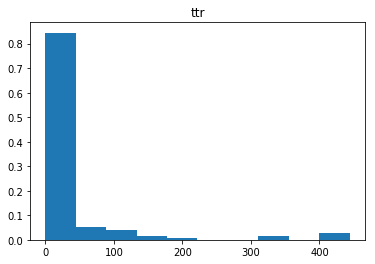

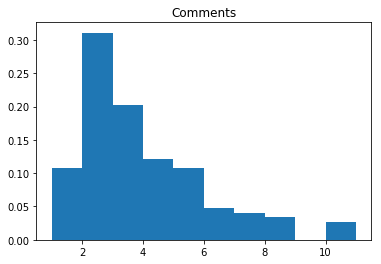

In [109]:
#отклоненные
print(q4.Issue_key.count())
infa(q4,'ttr')
infa(q4,'Comments')

In [92]:
for i in range(len(AOT)):
    print(q4[[AOT[i]+'_lab']].sum())

Docs_lab    10
dtype: int64
Build_lab    25
dtype: int64
MonitorManage_lab    9
dtype: int64
ESB_lab    44
dtype: int64
EDS_lab    32
dtype: int64
JBPM_lab    8
dtype: int64
JMS_lab    5
dtype: int64
Tools_lab    7
dtype: int64
EAP_lab    1
dtype: int64
jUddi_lab    3
dtype: int64
BPEL_lab    7
dtype: int64
JBossWS_lab    8
dtype: int64
JBRules_lab    3
dtype: int64
Examples_lab    8
dtype: int64
Other_lab    7
dtype: int64


140
ttr
Минимум: 0  Максимум: 962  Среднее: 233.2
Comments
Минимум: 1  Максимум: 25  Среднее: 4.2785714285714285


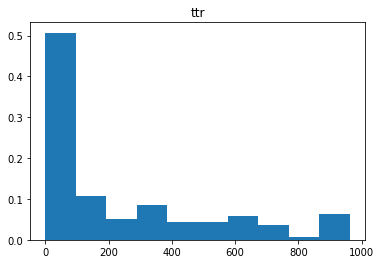

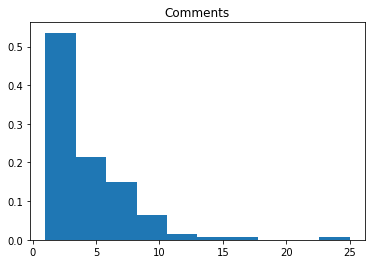

In [110]:
#Wont Fix
print(q5.Issue_key.count())
infa(q5,'ttr')
infa(q5,'Comments')

In [115]:
for i in range(len(AOT)):
    print(q5[[AOT[i]+'_lab']].sum())

Docs_lab    7
dtype: int64
Build_lab    17
dtype: int64
MonitorManage_lab    22
dtype: int64
ESB_lab    34
dtype: int64
EDS_lab    24
dtype: int64
JBPM_lab    12
dtype: int64
JMS_lab    2
dtype: int64
Tools_lab    15
dtype: int64
EAP_lab    3
dtype: int64
jUddi_lab    1
dtype: int64
BPEL_lab    3
dtype: int64
JBossWS_lab    2
dtype: int64
JBRules_lab    6
dtype: int64
Examples_lab    13
dtype: int64
Other_lab    7
dtype: int64


126
ttr
Минимум: 0  Максимум: 1354  Среднее: 238.515873015873
Comments
Минимум: 1  Максимум: 28  Среднее: 3.2222222222222223


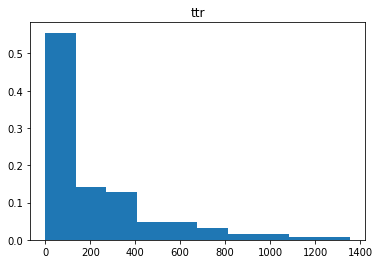

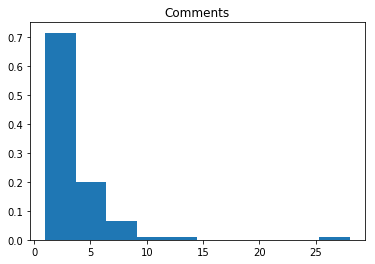

In [111]:
#migration
print(q6.Issue_key.count())
infa(q6,'ttr')
infa(q6,'Comments')

79
ttr
Минимум: 0  Максимум: 383  Среднее: 23.126582278481013
Comments
Минимум: 1  Максимум: 13  Среднее: 2.9240506329113924


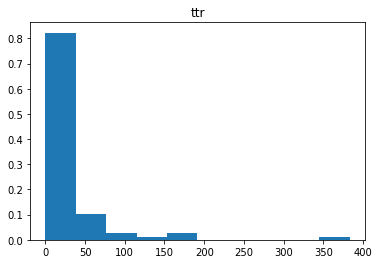

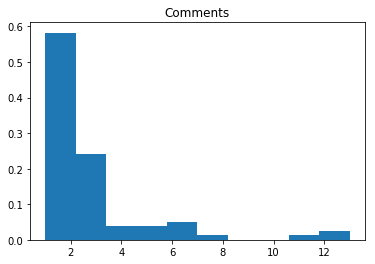

In [112]:
#дубликаты
print(q7.Issue_key.count())
infa(q7,'ttr')
infa(q7,'Comments')

510
ttr
Минимум: 0  Максимум: 1354  Среднее: 168.19607843137254
Comments
Минимум: 1  Максимум: 34  Среднее: 7.031372549019608


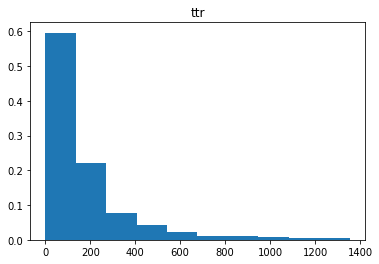

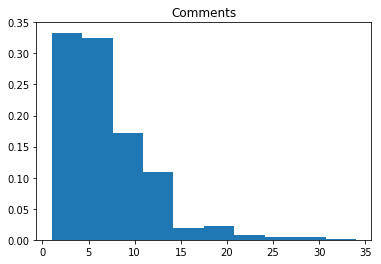

In [113]:
# reopened
print(q8.Issue_key.count())
infa(q8,'ttr')
infa(q8,'Comments')

In [116]:
for i in range(len(AOT)):
    print(q8[[AOT[i]+'_lab']].sum())

Docs_lab    79
dtype: int64
Build_lab    99
dtype: int64
MonitorManage_lab    42
dtype: int64
ESB_lab    148
dtype: int64
EDS_lab    47
dtype: int64
JBPM_lab    49
dtype: int64
JMS_lab    7
dtype: int64
Tools_lab    43
dtype: int64
EAP_lab    13
dtype: int64
jUddi_lab    17
dtype: int64
BPEL_lab    27
dtype: int64
JBossWS_lab    10
dtype: int64
JBRules_lab    15
dtype: int64
Examples_lab    41
dtype: int64
Other_lab    11
dtype: int64
